**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Marco Antonio Muñoz Chavez 
*   MATRÍCULA: A01686968
*   Fecha: 25/01/2026
*   Actividad 2: Análisis de datos con pandas

---

En esta actividad trabajarás con el archivo `cleaned_weather.csv`, un extracto del conjunto de datos meteorológicos a lo largo de todo el año 2020 en una estación del Instituto *Max Planck* (Alemania) disponible en Kaggle.

Los datos meteorológicos fueron registrados cada 10 minutos e incluyen los siguientes indicadores:

*   `timestamp`: Fecha y hora de la observación.
*   `p`: Presión atmosférica en milibares (mbar)
*   `T`: Temperatura del aire en grados Celsius (°C)
*   `Tpot`: Temperatura potencial en Kelvin (K)
*   `rh`: Humedad relativa en porcentaje (%)
*   `VPact`: Presión real de vapor en milibares (mbar)
*   `sh`: Humedad específica en gramos por kilogramo (g/kg)
*   `H2OC`: Concentración de vapor de agua en milimoles por mol (mmol/mol) de aire seco
*   `rho`: Densidad del aire en gramos por metro cúbico (g/m³)
*   `wv`: Velocidad del viento en metros por segundo (m/s)
*   `wd`: Dirección del viento en grados (°)
*   `rain`: Precipitación total en milímetros (mm)
*   `raining`: Duración de la lluvia en segundos (s)

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


In [ ]:
# Importa las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Configurar visualización
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)


1.	Descarga el archivo: `cleaned_weather.csv` y guarda, en un dataframe (`weather_df`), todos sus registros.
- Determina la dimensionalidad del dataframe y obtén los identificadores de columnas.
- Renombra las columnas para facilitar la interpretación de los indicadores en los ejercicios siguientes:
  - `medicion, presion_atmosferica, temperatura_celsius, temperatura_kelvin, humedad_relativa, presion_vapor, humedad_especifica, concentracion_vapor, densidad_aire, velocidad_viento, direccion_viento, precipitacion_total, duracion_lluvia`
- Muestra los primeros y los últimos 5 registros.
- ¿Hay valores faltantes en el dataframe?
El archivo cleaned_weather.csv fue cargado correctamente en un DataFrame de pandas con una dimensionalidad de 52,696 filas y 13 columnas. Se identificaron los nombres originales de las columnas y posteriormente se renombraron para facilitar la interpretación de los indicadores meteorológicos. Se mostraron los primeros y últimos cinco registros del DataFrame y se verificó que no existen valores faltantes en ninguna de las columnas.





In [ ]:
# 1. Cargar el archivo
weather_df = pd.read_csv('cleaned_weather.csv')

# 2. Dimensionalidad y columnas
print(f"Dimensionalidad: {weather_df.shape}")
print(f"Columnas originales: {list(weather_df.columns)}")

# 3. Renombrar columnas
nuevos_nombres = {
    'timestamp': 'medicion',
    'p': 'presion_atmosferica',
    'T': 'temperatura_celsius',
    'Tpot': 'temperatura_kelvin',
    'rh': 'humedad_relativa',
    'VPact': 'presion_vapor',
    'sh': 'humedad_especifica',
    'H2OC': 'concentracion_vapor',
    'rho': 'densidad_aire',
    'wv': 'velocidad_viento',
    'wd': 'direccion_viento',
    'rain': 'precipitacion_total',
    'raining': 'duracion_lluvia'
}
weather_df = weather_df.rename(columns=nuevos_nombres)

# 4. Primeros y últimos registros
print("Primeros 5 registros:")
print(weather_df.head())
print("\nÚltimos 5 registros:")
print(weather_df.tail())

# 5. Valores faltantes
print(f"\nValores faltantes por columna:")
print(weather_df.isnull().sum())

Dimensionalidad: (52696, 13)
Columnas originales: ['timestamp', 'p', 'T', 'Tpot', 'rh', 'VPact', 'sh', 'H2OC', 'rho', 'wv', 'wd', 'rain', 'raining']
Primeros 5 registros:
        medicion  presion_atmosferica  temperatura_celsius  \
0  01/01/20 0:10              1008.89                 0.71   
1  01/01/20 0:20              1008.76                 0.75   
2  01/01/20 0:30              1008.66                 0.73   
3  01/01/20 0:40              1008.64                 0.37   
4  01/01/20 0:50              1008.61                 0.33   

   temperatura_kelvin  humedad_relativa  presion_vapor  humedad_especifica  \
0              273.18              86.1           5.54                3.42   
1              273.22              85.2           5.49                3.39   
2              273.21              85.1           5.48                3.39   
3              272.86              86.3           5.41                3.35   
4              272.82              87.4           5.47            

2. Determina el tipo de datos que tienen las columnas.
- Cambia la columna `medicion` a datetime.
- Obtén dos columnas adicionales separando `medicion` en `fecha` y `hora`.

Las variables numéricas fueron identificadas correctamente y la columna medicion fue convertida a formato datetime. A partir de esta columna se crearon las variables fecha y hora, lo que facilita el análisis temporal de las mediciones.

In [ ]:
# 6. Tipos de datos
print("Tipos de datos:")
print(weather_df.dtypes)

# 7. Convertir medicion a datetime
weather_df['medicion'] = pd.to_datetime(weather_df['medicion'], format='%d/%m/%y %H:%M')

# 8. Crear columnas fecha y hora
weather_df['fecha'] = weather_df['medicion'].dt.date
weather_df['hora'] = weather_df['medicion'].dt.time

Tipos de datos:
medicion                   str
presion_atmosferica    float64
temperatura_celsius    float64
temperatura_kelvin     float64
humedad_relativa       float64
presion_vapor          float64
humedad_especifica     float64
concentracion_vapor    float64
densidad_aire          float64
velocidad_viento       float64
direccion_viento       float64
precipitacion_total    float64
duracion_lluvia          int64
dtype: object


3. Determina la cantidad de valores únicos de cada columna.
- La columna `medicion` tiene un valor menos que el número total de filas del dataframe, lo que indica que hay una fecha duplicada. Identifica cuál es.
- Comprueba si las demás columnas también contienen los mismos valores; si es así, elimina  uno de los registros duplicados.

Se calculó la cantidad de valores únicos por columna y se detectó un registro duplicado en la columna medicion. Al comprobar que todas las variables coincidían, se eliminó uno de los registros duplicados. Posteriormente, se verificó nuevamente la cantidad de valores únicos por columna.

Sobre las 144 horas:

Existen 144 mediciones por día debido a que los datos se registran cada 10 minutos (6 mediciones por hora durante 24 horas).


In [ ]:
# 9. Valores únicos por columna
print("Valores únicos por columna:")
for col in weather_df.columns:
    print(f"{col}: {weather_df[col].nunique()}")

# 10. Identificar duplicados en 'medicion'
duplicados = weather_df[weather_df['medicion'].duplicated(keep=False)]
print(f"\nRegistros duplicados en 'medicion': {len(duplicados)}")

# 11. Verificar si todas las columnas son iguales en duplicados
if len(duplicados) > 0:
    print("Comparando valores de columnas en duplicados...")
    primer_dup = duplicados.iloc[0]
    segundo_dup = duplicados.iloc[1]
    columnas_iguales = (primer_dup == segundo_dup).all()
    
    if columnas_iguales:
        weather_df = weather_df.drop_duplicates(subset=['medicion'], keep='first')
        print("Registro duplicado eliminado")

# 12. Nuevos valores únicos
print("\nNuevos valores únicos por columna:")
print(weather_df.nunique())

# 13. Explicación de 144 horas
print("\n144 horas diferentes porque hay 6 mediciones por hora (cada 10 minutos) x 24 horas = 144 mediciones diarias")

Valores únicos por columna:
medicion: 52695
presion_atmosferica: 5052
temperatura_celsius: 3680
temperatura_kelvin: 3836
humedad_relativa: 5494
presion_vapor: 2059
humedad_especifica: 1337
concentracion_vapor: 2087
densidad_aire: 14826
velocidad_viento: 977
direccion_viento: 8099
precipitacion_total: 42
duracion_lluvia: 61
fecha: 367
hora: 144

Registros duplicados en 'medicion': 2
Comparando valores de columnas en duplicados...
Registro duplicado eliminado

Nuevos valores únicos por columna:
medicion               52695
presion_atmosferica     5052
temperatura_celsius     3680
temperatura_kelvin      3836
humedad_relativa        5494
presion_vapor           2059
humedad_especifica      1337
concentracion_vapor     2087
densidad_aire          14826
velocidad_viento         977
direccion_viento        8099
precipitacion_total       42
duracion_lluvia           61
fecha                    367
hora                     144
dtype: int64

144 horas diferentes porque hay 6 mediciones por hora

4. Imprime nuevamente las cantidad de valores únicos por columna.
- ¿Por qué son 144 horas diferentes?
- La cantidad de combinaciones únicas de fecha y hora no coincide con el número total de mediciones. Aunque no haya valores NaN, esto no garantiza que no se hayan omitido registros. Identifica las fechas en las que faltan mediciones.
- Una vez concluido el análisis de mediciones faltantes, elimina todos los registros que no correspondan al año 2020 y la columna `medicion`.

Respuesta 

A pesar de que el DataFrame no presenta valores faltantes (NaN), se identificaron fechas con mediciones incompletas. En particular, el 01/01/2020 presenta 1 medición faltante, el 29/05/2020 presenta 9 mediciones faltantes, y el 01/01/2021 presenta 143 mediciones faltantes, lo cual se explica porque únicamente se registró una medición de ese día. Posteriormente, se eliminaron los registros que no corresponden al año 2020 y se descartó la columna medicion.


In [ ]:
# 14. Identificar mediciones faltantes
# Crear rango completo de fechas y horas esperado
fechas_unicas = weather_df['fecha'].unique()
horas_esperadas = pd.date_range('00:00', '23:50', freq='10min').time

# Verificar cada fecha
fechas_incompletas = []
for fecha in fechas_unicas:
    mediciones_fecha = weather_df[weather_df['fecha'] == fecha]
    horas_presentes = set(mediciones_fecha['hora'])
    horas_faltantes = set(horas_esperadas) - horas_presentes
    
    if len(horas_faltantes) > 0:
        fechas_incompletas.append((fecha, len(horas_faltantes)))

print(f"\nFechas con mediciones faltantes: {len(fechas_incompletas)}")
for fecha, faltantes in fechas_incompletas[:10]:  # Mostrar primeras 10
    print(f"{fecha}: {faltantes} mediciones faltantes")

# 15. Filtrar solo año 2020 y eliminar columna medicion
weather_df = weather_df[weather_df['medicion'].dt.year == 2020]
weather_df = weather_df.drop(columns=['medicion'])


Fechas con mediciones faltantes: 3
2020-01-01: 1 mediciones faltantes
2020-05-29: 9 mediciones faltantes
2021-01-01: 143 mediciones faltantes


5. Obtén un dataframe `indicadores_diarios` que sólo almacene el mayor valor de las mediciones por fecha para responder:
- ¿Cuál fue la máxima precipitación y a qué fecha pertenece?

   La máxima precipitación registrada fue de 11.2 mm, y ocurrió el 16 de junio de 2020.

- ¿Cuáles fueron los tres días con las velocidades de viento más altas registradas?

Los tres días con mayor velocidad del viento fueron:
10 de febrero de 2020, con 13.77 m/s
16 de febrero de 2020, con 13.0 m/s
9 de febrero de 2020, con 12.52 m/s

- ¿Cuántos días rebasaron el 90% de humedad relativa y los 30° celsius?

   Se identificaron 5 días en los que la humedad relativa superó el 90% y la temperatura fue mayor a 30 °C.

In [ ]:
# 16. Crear dataframe de indicadores diarios (valores máximos)
indicadores_diarios = weather_df.groupby('fecha').max()

# Preguntas:
# a) Máxima precipitación
max_precip = indicadores_diarios['precipitacion_total'].max()
fecha_max_precip = indicadores_diarios['precipitacion_total'].idxmax()
print(f"Máxima precipitación: {max_precip} mm el {fecha_max_precip}")

# b) Tres días con mayor velocidad del viento
top_viento = indicadores_diarios['velocidad_viento'].nlargest(3)
print("\nTres días con mayor velocidad del viento:")
for fecha, velocidad in top_viento.items():
    print(f"{fecha}: {velocidad} m/s")

# c) Días con humedad > 90% y temperatura > 30°C
condicion = (indicadores_diarios['humedad_relativa'] > 90) & (indicadores_diarios['temperatura_celsius'] > 30)
dias_calidos_humedos = indicadores_diarios[condicion]
print(f"\nDías con humedad >90% y temperatura >30°C: {len(dias_calidos_humedos)}")

Máxima precipitación: 11.2 mm el 2020-06-16

Tres días con mayor velocidad del viento:
2020-02-10: 13.77 m/s
2020-02-16: 13.0 m/s
2020-02-09: 12.52 m/s

Días con humedad >90% y temperatura >30°C: 5


6. La función `describe()` resume múltiples estadísticas descriptivas. Utiliza esta función para explorar y responder las preguntas sobre las variables en el dataframe de `indicadores_diarios `:
- ¿Cuál es la desviación estándar de la concentración de vapor y qué indica?
  
   Indica que la concentración de vapor varía en promedio 4.57 unidades entre los días respecto a la media.

- ¿Cuál es la mediana de la presión atmosférica y qué significa?
  
   El 50% de los días tuvo una presión menor y el otro 50% mayor a ese valor.
   
- ¿Cuál es el tercer cuartil de la duración de la lluvia y cómo se interpreta?
  
   El 75% de los días la lluvia duró menos de 600 s, y solo el 25% duró más.

In [ ]:
# 17. Usar describe()
descripcion = indicadores_diarios.describe()

# a) Desviación estándar de concentración de vapor
std_concentracion = descripcion.loc['std', 'concentracion_vapor']
print(f"Desviación estándar concentración vapor: {std_concentracion:.2f}")
print("Indica la variabilidad promedio de la concentración de vapor entre días")

# b) Mediana de presión atmosférica
mediana_presion = descripcion.loc['50%', 'presion_atmosferica']
print(f"\nMediana presión atmosférica: {mediana_presion:.2f}")
print("Es el valor central, el 50% de los días tuvo presión mayor y 50% menor")

# c) Tercer cuartil de duración de lluvia
q3_lluvia = descripcion.loc['75%', 'duracion_lluvia']
print(f"\nTercer cuartil duración lluvia: {q3_lluvia:.2f}")
print(f"El 75% de los días tuvo duración de lluvia menor a {q3_lluvia:.2f} segundos")

Desviación estándar concentración vapor: 4.57
Indica la variabilidad promedio de la concentración de vapor entre días

Mediana presión atmosférica: 993.30
Es el valor central, el 50% de los días tuvo presión mayor y 50% menor

Tercer cuartil duración lluvia: 600.00
El 75% de los días tuvo duración de lluvia menor a 600.00 segundos


7.	Dibuja un histograma para cada una de las columnas de `indicadores_diarios`.

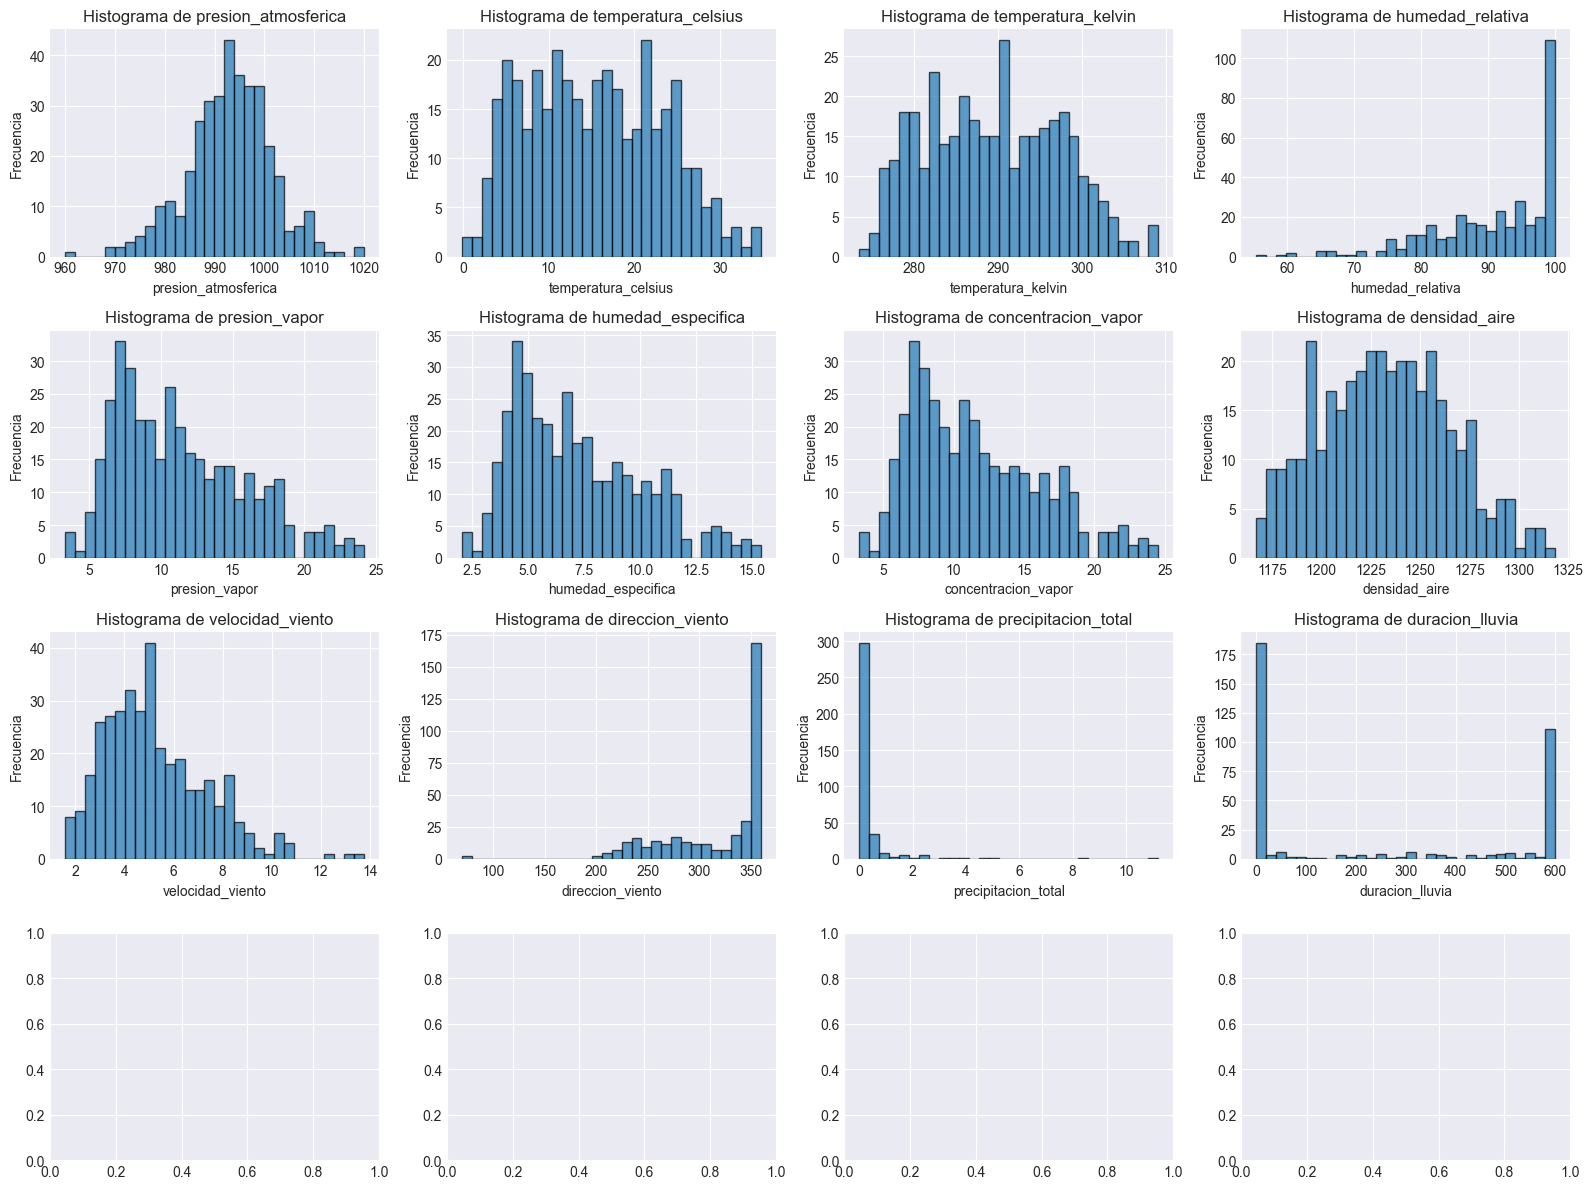

In [ ]:
# 18. Histogramas para todas las columnas
columnas_hist = indicadores_diarios.columns.drop(['fecha', 'hora'], errors='ignore')

fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(columnas_hist):
    if i < len(axes):
        axes[i].hist(indicadores_diarios[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Histograma de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

8. Utiliza el dataframe de indicadores diarios para crear un nuevo dataframe `indicadores_mensuales`. Para ello:
- Crea una nueva columna `mes` a partir de la fecha que se encuentra en el índice.
- Haciendo uso de `groupby()`, calcula los promedios mensuales y conserva únicamente las columnas `humedad_relativa`, `temperatura_celsius` y `velocidad_viento` en el nuevo dataframe.

In [ ]:
# 19. Crear columna mes
indicadores_diarios['fecha'] = pd.to_datetime(indicadores_diarios.index)
indicadores_diarios['mes'] = indicadores_diarios['fecha'].dt.month

# 20. Promedios mensuales con groupby
indicadores_mensuales_gb = indicadores_diarios.groupby('mes').agg({
    'humedad_relativa': 'mean',
    'temperatura_celsius': 'mean',
    'velocidad_viento': 'mean'
}).round(2)

print("Indicadores mensuales con groupby:")
print(indicadores_mensuales_gb)

Indicadores mensuales con groupby:
     humedad_relativa  temperatura_celsius  velocidad_viento
mes                                                         
1               89.78                 6.82              5.03
2               85.72                 8.96              7.49
3               85.37                 9.68              6.42
4               80.94                16.88              5.00
5               87.46                17.14              4.87
6               94.26                22.21              5.30
7               85.96                24.34              4.83
8               92.00                26.10              5.04
9               97.57                21.57              4.15
10              96.95                14.09              5.68
11              96.98                10.56              4.40
12              97.51                 5.68              4.82


9. Construye el mismo dataframe mensual, pero esta vez utilizando la función `pivot_table()`.
- Añade la columna `indice_calor` usando la fórmula de Thom (*Temperature - Humidity Index*, TDI):
> `temperatura_celsius + 0.33 x humedad_relativa - 0.7 x velocidad_viento - 4`

In [ ]:
# 21. Mismo resultado con pivot_table
indicadores_mensuales_pt = indicadores_diarios.pivot_table(
    index='mes',
    values=['humedad_relativa', 'temperatura_celsius', 'velocidad_viento'],
    aggfunc='mean'
).round(2)

# 22. Añadir índice de calor
indicadores_mensuales_pt['indice_calor'] = (
    indicadores_mensuales_pt['temperatura_celsius'] +
    0.33 * indicadores_mensuales_pt['humedad_relativa'] -
    0.7 * indicadores_mensuales_pt['velocidad_viento'] - 4
).round(2)

print("\nIndicadores mensuales con pivot_table e índice de calor:")
print(indicadores_mensuales_pt)


Indicadores mensuales con pivot_table e índice de calor:
     humedad_relativa  temperatura_celsius  velocidad_viento  indice_calor
mes                                                                       
1               89.78                 6.82              5.03         28.93
2               85.72                 8.96              7.49         28.00
3               85.37                 9.68              6.42         29.36
4               80.94                16.88              5.00         36.09
5               87.46                17.14              4.87         38.59
6               94.26                22.21              5.30         45.61
7               85.96                24.34              4.83         45.33
8               92.00                26.10              5.04         48.93
9               97.57                21.57              4.15         46.86
10              96.95                14.09              5.68         38.11
11              96.98                10.56

10. Recuerda que de las cuatro funciones estudiadas para manipular la estructura del dataframe:
- `melt/pivot` hacen las transformaciones de manera controlada, es decir puedes
definir por medio de sus parámetros qué variables quedarán como índices, columnas y valores.
- `stack/unstack` la conversión se aplica siempre sobre los niveles inferiores de index/columns.
- Convierte el dataframe del ejercicio anterior a formato largo usando: `melt()` y `stack()` y comenta las diferencias.

In [ ]:
# 23. Usar melt()
indicadores_largo_melt = indicadores_mensuales_pt.reset_index().melt(
    id_vars=['mes'],
    value_vars=['humedad_relativa', 'temperatura_celsius', 'velocidad_viento', 'indice_calor'],
    var_name='variable',
    value_name='valor'
)

print("Formato largo con melt():")
print(indicadores_largo_melt.head())

# 24. Usar stack()
indicadores_largo_stack = indicadores_mensuales_pt.stack().reset_index()
indicadores_largo_stack.columns = ['mes', 'variable', 'valor']

print("\nFormato largo con stack():")
print(indicadores_largo_stack.head())

# 25. Diferencias
print("\nDiferencias entre melt() y stack():")
print("melt(): Requiere especificar explícitamente id_vars y value_vars")
print("stack(): Convierte todas las columnas excepto el índice principal")
print("Ambos producen DataFrames similares pero stack() es más automático")

Formato largo con melt():
   mes          variable  valor
0    1  humedad_relativa  89.78
1    2  humedad_relativa  85.72
2    3  humedad_relativa  85.37
3    4  humedad_relativa  80.94
4    5  humedad_relativa  87.46

Formato largo con stack():
   mes             variable  valor
0    1     humedad_relativa  89.78
1    1  temperatura_celsius   6.82
2    1     velocidad_viento   5.03
3    1         indice_calor  28.93
4    2     humedad_relativa  85.72

Diferencias entre melt() y stack():
melt(): Requiere especificar explícitamente id_vars y value_vars
stack(): Convierte todas las columnas excepto el índice principal
Ambos producen DataFrames similares pero stack() es más automático
